In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

low_memory=False

# Store the path in variables
airlines_path = "https://raw.githubusercontent.com/wasif-siddiqui/Flight-Delay-Prediction-Using-LSTM/main/airlines.csv"
airport_path = "https://raw.githubusercontent.com/wasif-siddiqui/Flight-Delay-Prediction-Using-LSTM/main/airports.csv"
flights_path = "https://media.githubusercontent.com/media/wasif-siddiqui/Flight-Delay-Prediction-Using-LSTM/main/flights.csv"

# Load the data
airlines_data = pd.read_csv(airlines_path)
airport_data = pd.read_csv(airport_path)
flights_data = pd.read_csv(flights_path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
airlines_data.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [ ]:
flights_data.head(50000)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2015,1,4,7,AA,1524,N499AA,DFW,LAS,915,...,1010.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
49996,2015,1,4,7,AA,2316,N3FNAA,STX,MIA,915,...,1126.0,4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
49997,2015,1,4,7,AS,5,N566AS,DCA,LAX,915,...,1247.0,37.0,0,0,NaN,37.0,0.0,0.0,0.0,0.0
49998,2015,1,4,7,DL,688,N893AT,ATL,ICT,915,...,1037.0,-3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
flights_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [ ]:
df = flights_data
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def classifier(newdf):
  if newdf['ARRIVAL_DELAY'] >= 60.00: # over an hour late
    return 4
  elif newdf['ARRIVAL_DELAY'] >=30.00 and newdf['ARRIVAL_DELAY'] < 60.00: # 30min to an hour
    return 3
  elif newdf['ARRIVAL_DELAY'] >=15.00 and newdf['ARRIVAL_DELAY'] < 30.00: # 15min to 30min
    return 2
  elif newdf['ARRIVAL_DELAY'] >=0.00 and newdf['ARRIVAL_DELAY'] < 15.00: # 15min to 30min
    return 1
  else: # 0 to 15
    return 0

In [ ]:
df["DELAYED"] = df.apply(classifier, axis=1)
df.head(100)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAYED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2015,1,1,4,B6,2001,N358JB,BUF,JFK,535,...,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
96,2015,1,1,4,B6,2807,N190JB,PWM,JFK,535,...,-25.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
97,2015,1,1,4,B6,2023,N324JB,JFK,SJU,535,...,19.0,0,0,NaN,0.0,0.0,19.0,0.0,0.0,2
98,2015,1,1,4,EV,4557,N12967,CRP,IAH,535,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0


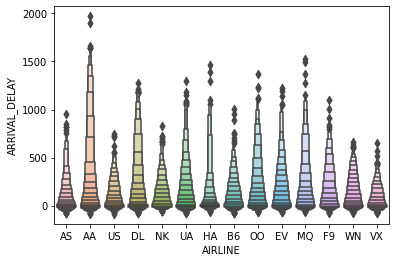

In [ ]:
#sns.scatterplot(data=df, x="DESTINATION_AIRPORT", y="ARRIVAL_DELAY")
sns.boxenplot(data=df, x="AIRLINE", y="ARRIVAL_DELAY",scale="linear")

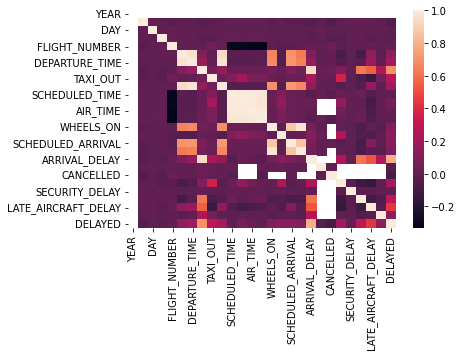

In [ ]:
sns.heatmap(df.corr())

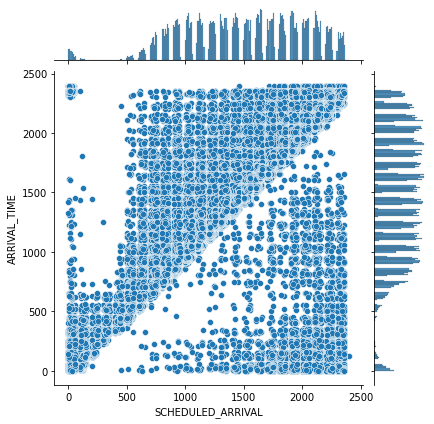

In [ ]:
sns.jointplot(data=df, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME")

In [ ]:
newdf = df.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT','SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME','AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON','ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', "CANCELLED"],
                                             axis=1)
newdf=newdf.fillna(newdf.mean())
newdf.head(100)

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAYED
0,1,1,5,-11.0,430,0,13.480568,0.076154,18.969547,23.472838,2.91529,0
1,1,1,10,-8.0,750,0,13.480568,0.076154,18.969547,23.472838,2.91529,0
2,1,1,20,-2.0,806,0,13.480568,0.076154,18.969547,23.472838,2.91529,1
3,1,1,20,-5.0,805,0,13.480568,0.076154,18.969547,23.472838,2.91529,0
4,1,1,25,-1.0,320,0,13.480568,0.076154,18.969547,23.472838,2.91529,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,535,-5.0,703,0,13.480568,0.076154,18.969547,23.472838,2.91529,0
96,1,1,535,-7.0,700,0,13.480568,0.076154,18.969547,23.472838,2.91529,0
97,1,1,535,43.0,1020,0,0.000000,0.000000,19.000000,0.000000,0.00000,2
98,1,1,535,-12.0,636,0,13.480568,0.076154,18.969547,23.472838,2.91529,0


In [ ]:
data = newdf.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
scaled_features = StandardScaler().fit_transform(X_train, X_test)

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [ ]:
pred_prob = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')
auc_score


0.8757743182697121